In [3]:
import cv2 as cv
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv_imshow
drive.mount('/content/drive')

cv.__version__

Mounted at /content/drive


'4.6.0'

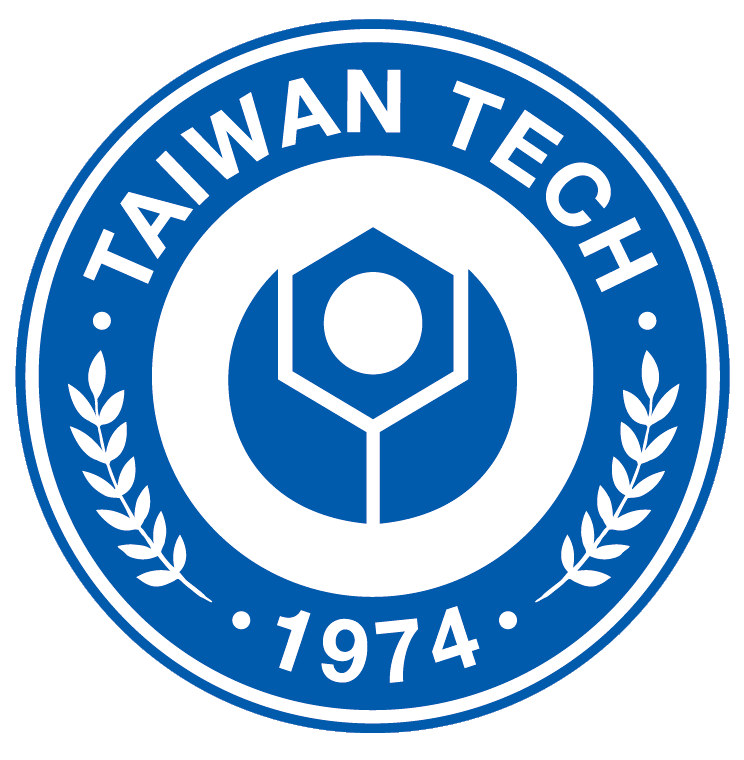

In [4]:
folder = r'/content/drive/MyDrive/images'
path_img = os.path.join(folder,'NTUST_logo.png')
img = cv.imread(path_img)

if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

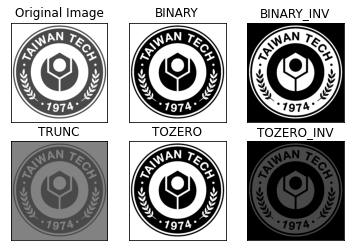

In [6]:
def Threshold(img):
  Thresholding = 130
  ret,thresh1 = cv.threshold(img,Thresholding,255,cv.THRESH_BINARY)
  ret,thresh2 = cv.threshold(img,Thresholding,255,cv.THRESH_BINARY_INV)
  ret,thresh3 = cv.threshold(img,Thresholding,0,cv.THRESH_TRUNC)
  ret,thresh4 = cv.threshold(img,Thresholding,0,cv.THRESH_TOZERO)
  ret,thresh5 = cv.threshold(img,Thresholding,255,cv.THRESH_TOZERO_INV)
  titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
  images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

  for i in range(len(images)):
    if(i == 0):
      cv.imwrite('original image.jpg',images[i])
    if(i > 0):
      cv.imwrite('thresh'+str(i)+'.jpg',images[i])
  for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
  plt.savefig('Image_Threshold_Result.jpg')
  plt.show()
Threshold(img_gray)


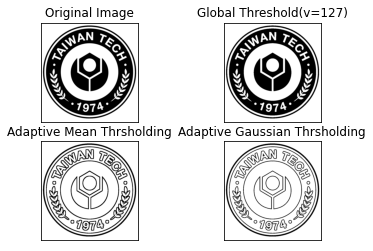

In [11]:
def AdaptiveThresholding(img):
  ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
  th2 = cv.adaptiveThreshold(
    img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2
  )
  th3 = cv.adaptiveThreshold(
    img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2
  )
  titles = ['Original Image','Global Threshold(v=127)','Adaptive Mean Thrsholding','Adaptive Gaussian Thrsholding']

  images = [img,th1,th2,th3]

  for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
  plt.show()
AdaptiveThresholding(img_gray)